# Estimating Covariance and Expected Returns


In [2]:
import pandas as pd
import numpy as np
import edhec_risk_kit_206 as erk

In [39]:
ind_rets = erk.get_ind_returns(weighting="ew",n_inds=49)["1974":]
ind_mcap = erk.get_ind_market_caps(n_inds=49,weights=True)["1974":]

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.131606,0.187437,-0.616296,6.771301,0.082035,0.122226,0.527384,-0.59806
CW,0.131522,0.187236,-0.544912,5.820495,0.081975,0.120151,0.527515,-0.58785


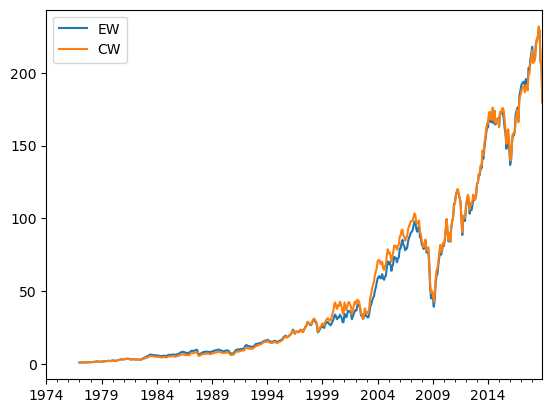

In [42]:
ewr = erk.backtest_ws(ind_rets,estimation_window=36,weighting=erk.weight_ew)
cwr = erk.backtest_ws(ind_rets,estimation_window=36,weighting=erk.weight_cw,cap_weights=ind_mcap)
btr = pd.DataFrame({"EW":ewr,"CW":cwr})
(1+btr).cumprod().plot()
erk.summary_stats(btr.dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.122317,0.187437,-0.616296,6.771301,0.082035,NaN,0.490657,-0.598060
CW,0.122239,0.187236,-0.544912,5.820495,0.081975,NaN,0.490780,-0.587850
GMV-S,0.142194,0.116303,-0.811386,6.408553,0.047674,NaN,0.957701,-0.463912


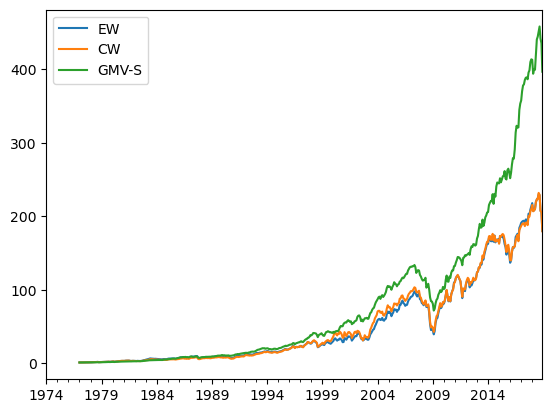

In [26]:
def sample_cov(r,**kwargs):
    """
    Returns the sample covariance of the supplied returns
    """
    return r.cov()

def weight_gmv(r,cov_estimator = sample_cov,**kargs):
    """
    Produces the weights of the GMV portfolio Given a covariance Matrix of returns"""

    est_cov = cov_estimator(r,**kargs)
    return erk.gmv(est_cov)

mv_s_r = erk.backtest_ws(ind_rets,estimation_window=36,weighting=weight_gmv,cov_estimator=sample_cov)
btr = pd.DataFrame({"EW":ewr,"CW":cwr,"GMV-S":mv_s_r})
(1+btr).cumprod().plot()
erk.summary_stats(btr)

# Examen

In [4]:
import numpy as np
import pandas as pd

import edhec_risk_kit_206 as erk

%load_ext autoreload
%autoreload 2
inds = ['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other']
#inds=['Beer', 'Hlth', 'Fin','Rtail','Whlsl']
ind_rets = erk.get_ind_returns(weighting="vw", n_inds=30)["1997":"2018"]
ind_mcap = erk.get_ind_market_caps(30, weights=True)["1997":"2018"]

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
eW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.53298
CW,0.065196,0.151478,-0.556621,4.249894,0.071076,0.098531,0.225949,-0.51899


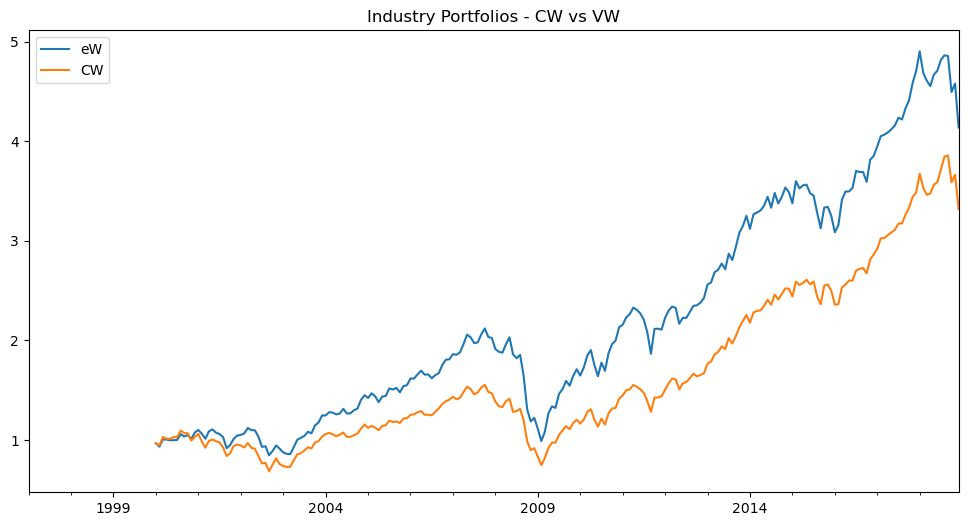

In [ ]:
ewr = erk.backtest_ws(ind_rets, estimation_window=36)
cwr = erk.backtest_ws(ind_rets, estimation_window=36,weighting=erk.weight_cw,  cap_weights=ind_mcap)
btr = pd.DataFrame({"eW": ewr, "CW": cwr})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios - CW vs VW")
erk.summary_stats(btr.dropna())


ind_rets = erk.get_ind_returns(weighting="ew",n_inds=30)["1997":"2018"]
ind_mcap = erk.get_ind_market_caps(n_inds=30,weights=True)["1997":"2018"]
# 3 portfolios to compare, cap-weighted, equal-weighted, equal-weighted with constraints
cap_weited = erk.backtest_ws(ind_rets,estimation_window=36,weighting=erk.weight_cw,cap_weights=ind_mcap)
eq_weighted = erk.backtest_ws(ind_rets,estimation_window=36,weighting=erk.weight_ew)
ew_portfolio = erk.backtest_ws(ind_rets,estimation_window=36,weighting=erk.weight_ew,cap_weights=ind_mcap,max_cw_mult=2,min_cw_mult=0.1)
btr = pd.DataFrame({"CW":cap_weited,"EW":eq_weighted,"EW Portfolio":ew_portfolio})
(1+btr).cumprod().plot()
erk.summary_stats(btr.dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
CW,0.089410,0.200157,-0.042647,4.608285,0.084834,0.120735,0.288642,-0.592543
EW,0.093968,0.199792,-0.132249,5.779663,0.084399,0.126279,0.311373,-0.610167
EW Portfolio,0.095463,0.193248,-0.136088,5.396361,0.081819,0.121210,0.329461,-0.600313


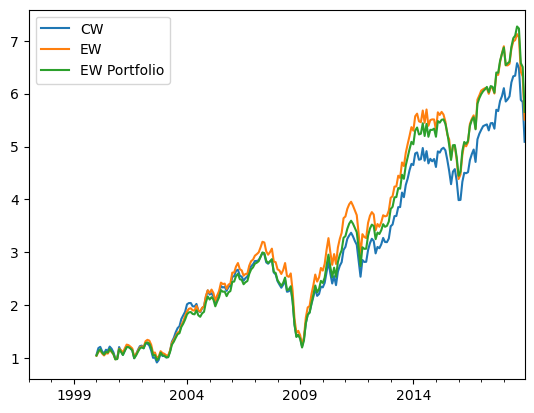

In [ ]:
ind_rets = erk.get_ind_returns(weighting="ew",n_inds=30)["1997":"2018"]
ind_mcap = erk.get_ind_market_caps(n_inds=30,weights=True)["1997":"2018"]
# 3 portfolios to compare, cap-weighted, equal-weighted, equal-weighted with constraints
cap_weited = erk.backtest_ws(ind_rets,estimation_window=36,weighting=erk.weight_cw,cap_weights=ind_mcap)
eq_weighted = erk.backtest_ws(ind_rets,estimation_window=36,weighting=erk.weight_ew)
ew_portfolio = erk.backtest_ws(ind_rets,estimation_window=36,weighting=erk.weight_ew,cap_weights=ind_mcap,max_cw_mult=2,min_cw_mult=0.1)
btr = pd.DataFrame({"CW":cap_weited,"EW":eq_weighted,"EW Portfolio":ew_portfolio})
(1+btr).cumprod().plot()
erk.summary_stats(btr.dropna())

In [6]:
erk.tracking_error(btr["CW"],btr["EW"])

np.float64(0.19586117179632534)

In [7]:
erk.tracking_error(btr["EW Portfolio"],btr["CW"])

np.float64(0.137451292280453)

# GMV Portfolio

In [9]:
gmv_port = erk.backtest_ws(ind_rets,estimation_window=36,weighting=erk.weight_gmv,cov_estimator=erk.sample_cov)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.080652,0.199792,-0.132249,5.779663,0.084399,NaN,0.267798,-0.610167
CW,0.076762,0.200157,-0.042647,4.608285,0.084834,NaN,0.248321,-0.592543
GMV,0.103374,0.119351,-0.642126,4.706133,0.051240,NaN,0.634597,-0.432802


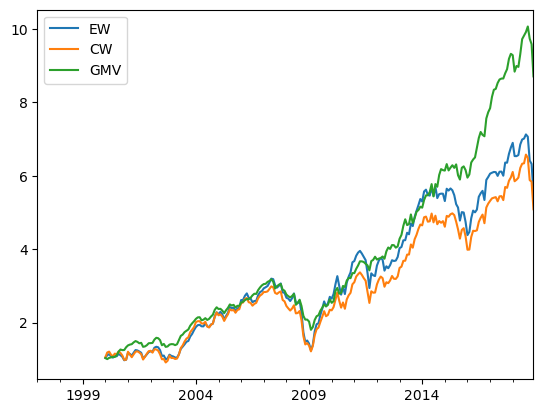

In [10]:
btr = pd.DataFrame({"EW":eq_weighted,"CW":cap_weited,"GMV":gmv_port})
(1+btr).cumprod().plot()
erk.summary_stats(btr)

# Global Minimun Variance shrinkage constant

In [11]:
GMV_shrinkage_constant = erk.weight_gmv(ind_rets,cov_estimator=erk.shrinkage_cov)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.080652,0.199792,-0.132249,5.779663,0.084399,NaN,0.267798,-0.610167
CW,0.076762,0.200157,-0.042647,4.608285,0.084834,NaN,0.248321,-0.592543
GMV-S,0.102397,0.117462,-0.830902,5.064258,0.051765,NaN,0.636678,-0.468075


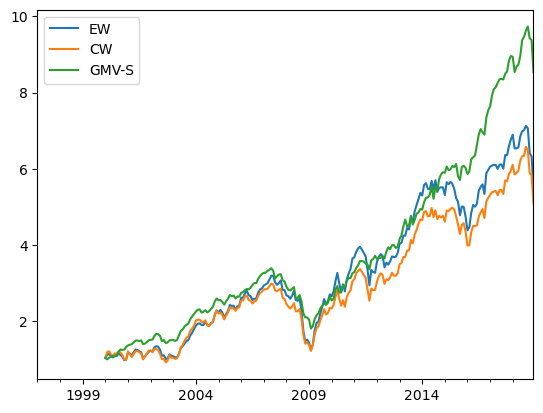

In [13]:
shrinkage = erk.backtest_ws(ind_rets,estimation_window=36,weighting=erk.weight_gmv,cov_estimator=erk.shrinkage_cov,delta = .25)
btr = pd.DataFrame({"EW":eq_weighted,"CW":cap_weited,"GMV-S":shrinkage})
(1+btr).cumprod().plot()
erk.summary_stats(btr)

# Otra vez Todo

In [31]:
import numpy as np
import pandas as pd
import edhec_risk_kit_206 as erk
inds = [
    'Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
    'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
    'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
    'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'
]


ind_rets = erk.get_ind_returns(weighting="ew",n_inds=49)["1974":]
ind_mcap = erk.get_ind_market_caps(49,weights=True)["1974":]

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.131606,0.187437,-0.616296,6.771301,0.082035,0.122226,0.527384,-0.59806
CW,0.131522,0.187236,-0.544912,5.820495,0.081975,0.120151,0.527515,-0.58785


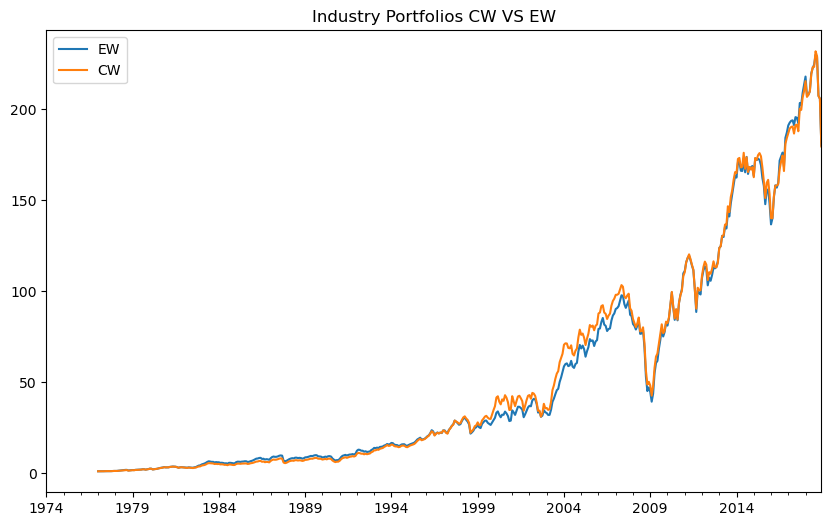

In [32]:
ewr = erk.backtest_ws(ind_rets,estimation_window=36,weighting=erk.weight_ew)
cwr = erk.backtest_ws(ind_rets,estimation_window=36,weighting=erk.weight_cw,cap_weights=ind_mcap)
btr = pd.DataFrame({"EW":ewr,"CW":cwr})
(1+btr).cumprod().plot(figsize=(10,6),title="Industry Portfolios CW VS EW")
erk.summary_stats(btr.dropna())

# Examne


In [35]:
ind_rets = erk.get_ind_returns(weighting="ew",n_inds=30)["1997":]
ind_mcap = erk.get_ind_market_caps(n_inds=30,weights=True)["1997":]
# 3 portfolios to compare, cap-weighted, equal-weighted, equal-weighted with constraints
# Cap weighted
cap_weited = erk.backtest_ws(ind_rets,estimation_window=36,weighting=erk.weight_cw,cap_weights=ind_mcap)
# Equal weighted
eq_weighted = erk.backtest_ws(ind_rets,estimation_window=36,weighting=erk.weight_ew)
# Equal weighted with constraints
ew_portfolio = erk.backtest_ws(ind_rets,estimation_window=36,weighting=erk.weight_ew,cap_weights=ind_mcap,max_cw_mult=2,min_cw_mult=0.01)
# GMV Sample Covariance
gmv_sample = erk.backtest_ws(ind_rets,estimation_window=36,weighting=erk.weight_gmv,cov_estimator=erk.sample_cov)
# Shrink Constant and sample
gmv_shrink = erk.backtest_ws(ind_rets,estimation_window=36,weighting=erk.weight_gmv,cov_estimator=erk.shrinkage_cov,delta=0.25)

btr = pd.DataFrame({"CW":cap_weited,"EW":eq_weighted,"EW Portfolio":ew_portfolio,"GMV-Sample":gmv_sample,"GMV-Shrink":gmv_shrink})
erk.summary_stats(btr.dropna())


,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
CW,0.089410,0.200157,-0.042647,4.608285,0.084834,0.120735,0.288642,-0.592543
EW,0.093968,0.199792,-0.132249,5.779663,0.084399,0.126279,0.311373,-0.610167
EW Portfolio,0.095463,0.193248,-0.136088,5.396361,0.081819,0.121210,0.329461,-0.600313
GMV-Sample,0.120646,0.119351,-0.642126,4.706133,0.051240,0.077378,0.739100,-0.432802
GMV-Shrink,0.119497,0.117462,-0.830902,5.064258,0.051765,0.078094,0.741471,-0.468075


In [36]:
erk.tracking_error(btr["EW"].dropna(),btr["CW"].dropna())

np.float64(0.19586117179632534)

In [37]:
erk.tracking_error(btr["EW Portfolio"].dropna(),btr["CW"].dropna())

np.float64(0.137451292280453)